In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./marketdata2.csv').drop(['Unnamed: 0'], axis=1)


In [3]:
df

,age,marital,segment,SocialMedia,income,creditRating,aveSpend,touchpoints,nTouchpoints,recent_touchpoint,...,N,Y,C,B,D,A,F,E,New,G
0,38,single,P4,U,51000.0,C,5007.50,emailDestination mailDiscount,2,mailDiscount,...,0,0,1,0,0,0,0,0,0,0
1,39,divorced,P3,U,100000.0,B,19.74,emailDestination mailGift,2,mailGift,...,0,0,0,1,0,0,0,0,0,0
2,41,married,P4,N,51000.0,D,320.10,emailDiscount mailGift emailDiscount,3,emailDiscount,...,1,0,0,0,1,0,0,0,0,0
3,60,married,P4,U,152000.0,C,39.47,mailDiscount,1,mailDiscount,...,0,0,1,0,0,0,0,0,0,0
4,47,married,P2,Y,60000.0,A,19.89,mailDestination emailDestination emailDestination,3,emailDestination,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14984,32,married,P1,U,33000.0,E,4280.63,emailDestination emailDestination emailDestina...,7,mailDiscount,...,0,0,0,0,0,0,0,1,0,0
14985,53,divorced,P3,N,61000.0,F,1332.29,smsDestination mailDiscount emailDestination e...,6,mailDiscount,...,1,0,0,0,0,0,1,0,0,0
14986,30,single,P4,N,44000.0,C,4010.00,emailDestination emailDestination mailDiscount...,4,mailDiscount,...,1,0,1,0,0,0,0,0,0,0
14987,52,married,P4,N,71000.0,C,507.46,emailDestination mailGift emailDiscount smsDes...,8,emailDestination,...,1,0,1,0,0,0,0,0,0,0


Check distribution of all numerical variables excluding one-hot encoded variables

In [4]:
vars_list = ['age','income','aveSpend']

for var in vars_list:
    print(var.upper() + ' Distribution')
    print(df[var].describe())
    print('-----')

AGE Distribution
count    14989.000000
mean        39.223964
std          9.276033
min         20.000000
25%         32.000000
50%         37.000000
75%         46.000000
max         60.000000
Name: age, dtype: float64
-----
INCOME Distribution
count     14989.000000
mean      71590.041216
std       36821.917752
min       10000.000000
25%       45000.000000
50%       64000.000000
75%       90000.000000
max      249000.000000
Name: income, dtype: float64
-----
AVESPEND Distribution
count    14989.000000
mean       714.399585
std       2164.764542
min          0.000000
25%         20.420000
50%         91.470000
75%        426.230000
max      17889.740000
Name: aveSpend, dtype: float64
-----


Note that the max-min range of all 3 variables are very different from one another. When we do further analysis, like multivariate linear regression, for example, the attributed income will intrinsically influence the result more due to its larger value. Hence, it is important to standardize and normalize the data to bring all variables to the same range.

I use a Robust Scaler (QuantileTransformer): similar to normalization but it instead uses the interquartile range, so that it is robust to outliers.

In [5]:
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(output_distribution='normal')

In [6]:
df['nAveSpend'] = qt.fit_transform(df[['aveSpend']].values.reshape(-1,1))
df['nIncome'] = qt.fit_transform(df[['income']].values.reshape(-1,1))
df['nAge'] = qt.fit_transform(df[['age']].values.reshape(-1,1))

In [7]:
df

,age,marital,segment,SocialMedia,income,creditRating,aveSpend,touchpoints,nTouchpoints,recent_touchpoint,...,B,D,A,F,E,New,G,nAveSpend,nIncome,nAge
0,38,single,P4,U,51000.0,C,5007.50,emailDestination mailDiscount,2,mailDiscount,...,0,0,0,0,0,0,0,1.798751,-0.406079,0.037646
1,39,divorced,P3,U,100000.0,B,19.74,emailDestination mailGift,2,mailGift,...,1,0,0,0,0,0,0,-0.694311,0.912774,0.123259
2,41,married,P4,N,51000.0,D,320.10,emailDiscount mailGift emailDiscount,3,emailDiscount,...,0,1,0,0,0,0,0,0.559895,-0.406079,0.283522
3,60,married,P4,U,152000.0,C,39.47,mailDiscount,1,mailDiscount,...,0,0,0,0,0,0,0,-0.362850,1.831224,5.199338
4,47,married,P2,Y,60000.0,A,19.89,mailDestination emailDestination emailDestination,3,emailDestination,...,0,0,1,0,0,0,0,-0.687284,-0.106841,0.744694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14984,32,married,P1,U,33000.0,E,4280.63,emailDestination emailDestination emailDestina...,7,mailDiscount,...,0,0,0,0,1,0,0,1.748868,-1.340200,-0.659602
14985,53,divorced,P3,N,61000.0,F,1332.29,smsDestination mailDiscount emailDestination e...,6,mailDiscount,...,0,0,0,1,0,0,0,1.280981,-0.051460,1.269664
14986,30,single,P4,N,44000.0,C,4010.00,emailDestination emailDestination mailDiscount...,4,mailDiscount,...,0,0,0,0,0,0,0,1.694923,-0.758004,-0.985610
14987,52,married,P4,N,71000.0,C,507.46,emailDestination mailGift emailDiscount smsDes...,8,emailDestination,...,0,0,0,0,0,0,0,0.779682,0.240671,1.169401


In [8]:
df.columns

Index(['age', 'marital', 'segment', 'SocialMedia', 'income', 'creditRating',
       'aveSpend', 'touchpoints', 'nTouchpoints', 'recent_touchpoint',
       'num_creditRating', 'single', 'divorced', 'married', 'unknown', 'P4',
       'P3', 'P2', 'P1', 'U', 'N', 'Y', 'C', 'B', 'D', 'A', 'F', 'E', 'New',
       'G', 'nAveSpend', 'nIncome', 'nAge'],
      dtype='object')

Check distribution of scaled variables

Plot for NAGE: total counts = 14989


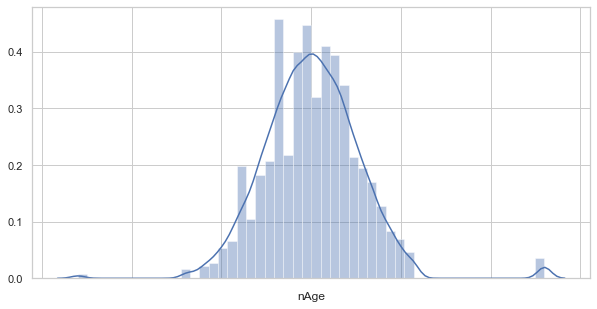

Plot for NINCOME: total counts = 14989


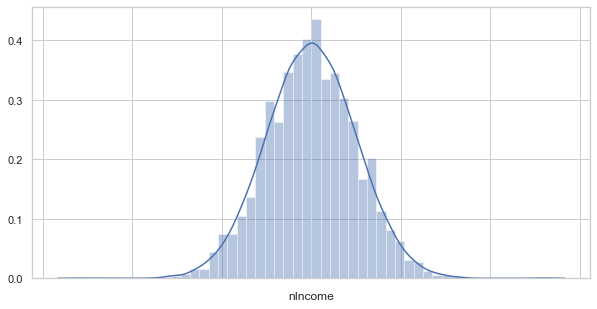

Plot for NAVESPEND: total counts = 14989


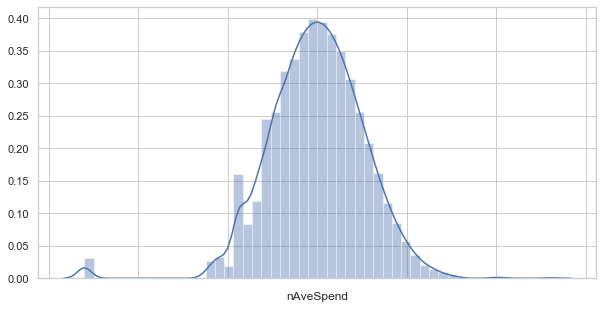

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

df_explore = df[['nAge', 'nIncome', 'nAveSpend']]
for cat in df_explore:
    cat_num = df_explore[cat]
    print("Plot for %s: total counts = %d" % (cat.upper(), len(cat_num)))
    f, ax = plt.subplots(figsize=(10,5))
    plot = sns.distplot(cat_num)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
    plt.show()

Now our numerical variables follow a normal distribution. We will start labeling our data using the most recent touchpoint. Lets see how many possible labels are there in our data.

In [10]:
df['recent_touchpoint'].unique()

array(['mailDiscount', 'mailGift', 'emailDiscount', 'emailDestination',
       'smsDiscount', 'smsDestination', 'emailGift', 'smsGift',
       'mailDestination'], dtype=object)

I assume these are the latest touchpoint each customer went through before making a purchase.

In [11]:
#create a mapping from labels to a unique integer and vice versa for labelling and prediction later
labels = df['recent_touchpoint'].unique()
i = 0
idx2class = {} 
class2idx = {}
for tp in labels:
    idx2class[i] = tp
    class2idx[tp] = i
    i += 1
idx2class

{0: 'mailDiscount',
 1: 'mailGift',
 2: 'emailDiscount',
 3: 'emailDestination',
 4: 'smsDiscount',
 5: 'smsDestination',
 6: 'emailGift',
 7: 'smsGift',
 8: 'mailDestination'}

In [12]:
class2idx

{'mailDiscount': 0,
 'mailGift': 1,
 'emailDiscount': 2,
 'emailDestination': 3,
 'smsDiscount': 4,
 'smsDestination': 5,
 'emailGift': 6,
 'smsGift': 7,
 'mailDestination': 8}

In [13]:
df['label'] = df['recent_touchpoint'].replace(class2idx)

In [14]:
df

,age,marital,segment,SocialMedia,income,creditRating,aveSpend,touchpoints,nTouchpoints,recent_touchpoint,...,D,A,F,E,New,G,nAveSpend,nIncome,nAge,label
0,38,single,P4,U,51000.0,C,5007.50,emailDestination mailDiscount,2,mailDiscount,...,0,0,0,0,0,0,1.798751,-0.406079,0.037646,0
1,39,divorced,P3,U,100000.0,B,19.74,emailDestination mailGift,2,mailGift,...,0,0,0,0,0,0,-0.694311,0.912774,0.123259,1
2,41,married,P4,N,51000.0,D,320.10,emailDiscount mailGift emailDiscount,3,emailDiscount,...,1,0,0,0,0,0,0.559895,-0.406079,0.283522,2
3,60,married,P4,U,152000.0,C,39.47,mailDiscount,1,mailDiscount,...,0,0,0,0,0,0,-0.362850,1.831224,5.199338,0
4,47,married,P2,Y,60000.0,A,19.89,mailDestination emailDestination emailDestination,3,emailDestination,...,0,1,0,0,0,0,-0.687284,-0.106841,0.744694,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14984,32,married,P1,U,33000.0,E,4280.63,emailDestination emailDestination emailDestina...,7,mailDiscount,...,0,0,0,1,0,0,1.748868,-1.340200,-0.659602,0
14985,53,divorced,P3,N,61000.0,F,1332.29,smsDestination mailDiscount emailDestination e...,6,mailDiscount,...,0,0,1,0,0,0,1.280981,-0.051460,1.269664,0
14986,30,single,P4,N,44000.0,C,4010.00,emailDestination emailDestination mailDiscount...,4,mailDiscount,...,0,0,0,0,0,0,1.694923,-0.758004,-0.985610,0
14987,52,married,P4,N,71000.0,C,507.46,emailDestination mailGift emailDiscount smsDes...,8,emailDestination,...,0,0,0,0,0,0,0.779682,0.240671,1.169401,3


Select columns we want to use for our model

In [15]:
df.columns

Index(['age', 'marital', 'segment', 'SocialMedia', 'income', 'creditRating',
       'aveSpend', 'touchpoints', 'nTouchpoints', 'recent_touchpoint',
       'num_creditRating', 'single', 'divorced', 'married', 'unknown', 'P4',
       'P3', 'P2', 'P1', 'U', 'N', 'Y', 'C', 'B', 'D', 'A', 'F', 'E', 'New',
       'G', 'nAveSpend', 'nIncome', 'nAge', 'label'],
      dtype='object')

When a dataset is imbalanced, i.e., the distribution of target variables is not uniform, we should make sure that the training-validation split is stratified. This ensures that the distribution of the target variable is preserved in both the training and validation datasets.

In [16]:
def stratified_split(df, target, val_percent=0.2):
    '''
    Function to split a dataframe into train and validation sets, while preserving the ratio of the labels in the target variable
    Inputs:
    - df, the dataframe
    - target, the target variable
    - val_percent, the percentage of validation samples, default 0.2
    Outputs:
    - train_idxs, the indices of the training dataset
    - val_idxs, the indices of the validation dataset
    '''
    classes=list(df[target].unique())
    train_idxs, val_idxs = [], []
    for c in classes:
        idx=list(df[df[target]==c].index)
        np.random.shuffle(idx)
        val_size=int(len(idx)*val_percent)
        val_idxs+=idx[:val_size]
        train_idxs+=idx[val_size:]
    return train_idxs, val_idxs


train_idxs, val_idxs = stratified_split(df, 'label', val_percent=0.25)

val_idxs, test_idxs = stratified_split(df[df.index.isin(val_idxs)], 'label', val_percent=0.5)

In [17]:
def test_stratified(df, col):
    '''
    Analyzes the ratio of different classes in a categorical variable within a dataframe
    Inputs:
    - dataframe
    - categorical column to be analyzed
    Returns: None
    '''
    classes=list(df[col].unique())
    
    for c in classes:
        print(f'Proportion of records with {c}: {len(df[df[col]==c])*1./len(df):0.2} ({len(df[df[col]==c])} / {len(df)})')

In [18]:
print('---------- STRATIFIED SAMPLING REPORT ----------')
print('-------- Label proportions in FULL data --------')
test_stratified(df, 'label')
print('-------- Label proportions in TRAIN data --------')
test_stratified(df[df.index.isin(train_idxs)], 'label')
print('------ Label proportions in VALIDATION data -----')
test_stratified(df[df.index.isin(val_idxs)], 'label')
print('-------- Label proportions in TEST data ---------')
test_stratified(df[df.index.isin(test_idxs)], 'label')

---------- STRATIFIED SAMPLING REPORT ----------
-------- Label proportions in FULL data --------
Proportion of records with 0: 0.12 (1837 / 14989)
Proportion of records with 1: 0.043 (643 / 14989)
Proportion of records with 2: 0.22 (3229 / 14989)
Proportion of records with 3: 0.37 (5542 / 14989)
Proportion of records with 4: 0.077 (1149 / 14989)
Proportion of records with 5: 0.039 (585 / 14989)
Proportion of records with 6: 0.048 (722 / 14989)
Proportion of records with 7: 0.04 (598 / 14989)
Proportion of records with 8: 0.046 (684 / 14989)
-------- Label proportions in TRAIN data --------
Proportion of records with 1: 0.043 (483 / 11245)
Proportion of records with 2: 0.22 (2422 / 11245)
Proportion of records with 0: 0.12 (1378 / 11245)
Proportion of records with 3: 0.37 (4157 / 11245)
Proportion of records with 4: 0.077 (862 / 11245)
Proportion of records with 7: 0.04 (449 / 11245)
Proportion of records with 6: 0.048 (542 / 11245)
Proportion of records with 8: 0.046 (513 / 11245)
Pro

In [19]:
train_df = df[df.index.isin(train_idxs)]
X_train = train_df[['nTouchpoints', 'single', 'divorced', 'married', 'unknown', 'P4',
       'P3', 'P2', 'P1', 'U', 'N', 'Y', 'C', 'B', 'D', 'A', 'F', 'E', 'New',
       'G', 'nAveSpend', 'nIncome', 'nAge']].values
Y_train = train_df[['label']].values
print('Retrieved Training Data')
val_df = df[df.index.isin(val_idxs)]
X_val = val_df[['nTouchpoints', 'single', 'divorced', 'married', 'unknown', 'P4',
       'P3', 'P2', 'P1', 'U', 'N', 'Y', 'C', 'B', 'D', 'A', 'F', 'E', 'New',
       'G', 'nAveSpend', 'nIncome', 'nAge']].values
Y_val = val_df[['label']].values
print('Retrieved Validation Data')
test_df = df[df.index.isin(test_idxs)]
X_test = test_df[['nTouchpoints', 'single', 'divorced', 'married', 'unknown', 'P4',
       'P3', 'P2', 'P1', 'U', 'N', 'Y', 'C', 'B', 'D', 'A', 'F', 'E', 'New',
       'G', 'nAveSpend', 'nIncome', 'nAge']].values
Y_test = test_df[['label']].values
print('Retrieved Test Data')

Retrieved Training Data
Retrieved Validation Data
Retrieved Test Data


#### For simplicity, I will explore Logistic regression(OneVsRest) as the baseline model and progressively use more complicated ensemble models for our prediction task such as XGBoost.


## Random Forest

## XGBoost

In [29]:
training_data = {'X_train':X_train,'Y_train':Y_train,
                'X_val': X_val,'Y_val':Y_val,
                'X_test': X_test,'Y_test':Y_test}

In [74]:
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score

#allow logloss and classification error plots for each iteraetion of xgb model
def plot_compare(metrics,eval_results,epochs):
    for m in metrics:
        test_score = eval_results['val'][m]
        train_score = eval_results['train'][m]
        rang = range(0, epochs)
        plt.rcParams["figure.figsize"] = [7,7]
        plt.plot(rang, test_score,"c", label="Val")
        plt.plot(rang, train_score,"orange", label="Train")
        title_name = m + " plot"
        plt.title(title_name)
        plt.xlabel('Iterations')
        plt.ylabel(m)
        lgd = plt.legend()
        plt.show()
        
def fitXgb(sk_model, training_data=training_data,epochs=300):
    print('Fitting model...')
    sk_model.fit(training_data['X_train'], training_data['Y_train'].reshape(training_data['Y_train'].shape[0],))
    print('Fitting done!')
    train = xgb.DMatrix(training_data['X_train'], label=training_data['Y_train'])
    val = xgb.DMatrix(training_data['X_val'], label=training_data['Y_val'])
    params = sk_model.get_xgb_params()
    metrics = ['mlogloss','merror']
    params['eval_metric'] = metrics
    store = {}
    evallist = [(val, 'val'),(train,'train')]
    xgb_model = xgb.train(params, train, epochs, evallist,evals_result=store,verbose_eval=100)
    print('-- Model Report --')
    print('XGBoost Accuracy: '+str(accuracy_score(sk_model.predict(training_data['X_test']), training_data['Y_test'])))
    print('XGBoost F1-Score (Micro): '+str(f1_score(sk_model.predict(training_data['X_test']),training_data['Y_test'],average='micro')))
    plot_compare(metrics,store,epochs)
    features = ['nTouchpoints', 'single', 'divorced', 'married', 'unknown', 'P4',
       'P3', 'P2', 'P1', 'U', 'N', 'Y', 'C', 'B', 'D', 'A', 'F', 'E', 'New',
       'G', 'nAveSpend', 'nIncome', 'nAge']
    f, ax = plt.subplots(figsize=(10,5))
    plot = sns.barplot(x=features, y=sk_model.feature_importances_)
    ax.set_title('Feature Importance')
    plot.set_xticklabels(plot.get_xticklabels(),rotation='vertical')
    plt.show()

### XGBoost hyperparameter tuning with GridSearchCV

#### Initial model

In [76]:
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV
#initial model
xgb1 = XGBClassifier(learning_rate=0.1,
                    n_estimators=1000,
                    max_depth=5,
                    min_child_weight=1,
                    gamma=0,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    objective='multi:softmax',
                    nthread=4,
                    num_class=9,
                    seed=27)

Fitting model...
Fitting done!
[0]	val-mlogloss:2.07116	val-merror:0.49547	train-mlogloss:2.07036	train-merror:0.49435
[100]	val-mlogloss:0.94984	val-merror:0.28160	train-mlogloss:0.84953	train-merror:0.22979
[200]	val-mlogloss:0.67841	val-merror:0.15947	train-mlogloss:0.54003	train-merror:0.08706
[299]	val-mlogloss:0.51569	val-merror:0.09920	train-mlogloss:0.36673	train-merror:0.03691
-- Model Report --
XGBoost Accuracy: 0.9668271803103263
XGBoost F1-Score (Micro): 0.9668271803103263


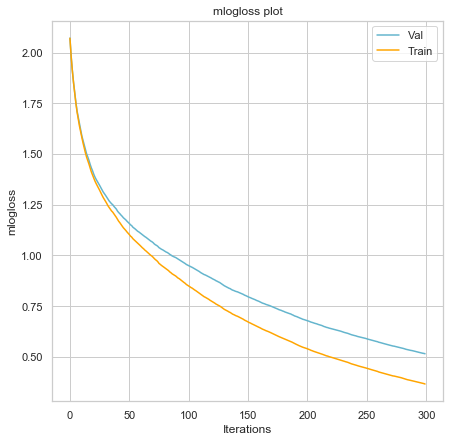

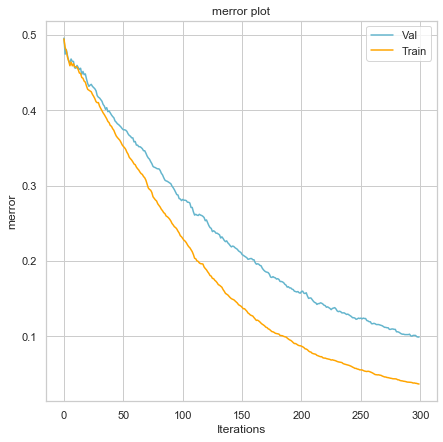

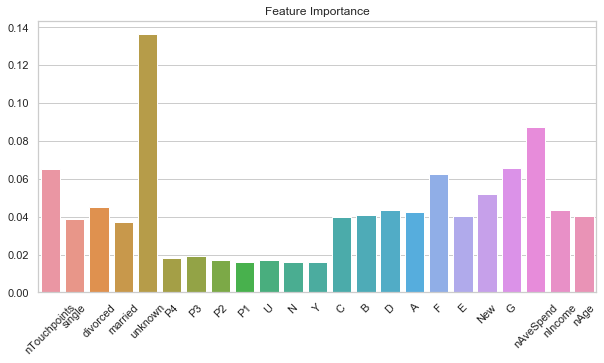

In [71]:
fitXgb(xgb1, training_data)

#### Tune max_depth and min_child_weight

In [85]:
def getTrainScores(gs):
    results = {}
    runs = 0
    for x,y in zip(list(gs.cv_results_['mean_test_score']), gs.cv_results_['params']):
        results[runs] = 'mean:' + str(x) + 'params' + str(y)
        runs += 1
    best = {'best_mean': gs.best_score_, "best_param":gs.best_params_}
    return results, best


In [84]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
#metrics to consider: f1_micro, f1_macro, roc_auc_ovr
gsearch1 = GridSearchCV(estimator = xgb1, param_grid = param_test1, scoring='f1_micro',n_jobs=-1,verbose = 10, cv=5)
gsearch1.fit(X_train, Y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 15.3min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 23.8min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed: 30.8min
[Parallel(n_jobs=-1)]: Done  52 out of  60 | elapsed: 38.7min remaining:  5.9min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 44.0min finished
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=0, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=5, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=1000,...
                                     objective='multi:softmax',
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     seed=27, subsample=0.8, tree_meth

In [86]:
getTrainScores(gsearch1)

({0: "mean:0.8630502445531347params{'max_depth': 3, 'min_child_weight': 1}",
  1: "mean:0.8412627834593153params{'max_depth': 3, 'min_child_weight': 3}",
  2: "mean:0.8196531791907514params{'max_depth': 3, 'min_child_weight': 5}",
  3: "mean:0.9425522454424188params{'max_depth': 5, 'min_child_weight': 1}",
  4: "mean:0.9318808359270786params{'max_depth': 5, 'min_child_weight': 3}",
  5: "mean:0.9207647843485993params{'max_depth': 5, 'min_child_weight': 5}",
  6: "mean:0.9451311694086261params{'max_depth': 7, 'min_child_weight': 1}",
  7: "mean:0.9397065362383282params{'max_depth': 7, 'min_child_weight': 3}",
  8: "mean:0.9338372610048911params{'max_depth': 7, 'min_child_weight': 5}",
  9: "mean:0.9458425967096489params{'max_depth': 9, 'min_child_weight': 1}",
  10: "mean:0.9400622498888394params{'max_depth': 9, 'min_child_weight': 3}",
  11: "mean:0.9368608270342375params{'max_depth': 9, 'min_child_weight': 5}"},
 {'best_mean': 0.9458425967096489,
  'best_param': {'max_depth': 9, 'min_

Through GridSearchCV, we see that the best parameters for max_depth and min_child_weight are 9 and 1 respectively.

Fitting model...
Fitting done!
[0]	val-mlogloss:2.02634	val-merror:0.39200	train-mlogloss:2.01941	train-merror:0.36078
[100]	val-mlogloss:0.42041	val-merror:0.06987	train-mlogloss:0.27151	train-merror:0.01272
[200]	val-mlogloss:0.22706	val-merror:0.02987	train-mlogloss:0.09315	train-merror:0.00044
[299]	val-mlogloss:0.16545	val-merror:0.02507	train-mlogloss:0.04507	train-merror:0.00000
-- Model Report --
XGBoost Accuracy: 0.9684323167469235
XGBoost F1-Score (Micro): 0.9684323167469235


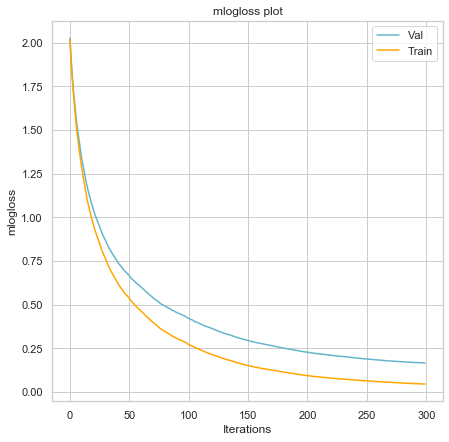

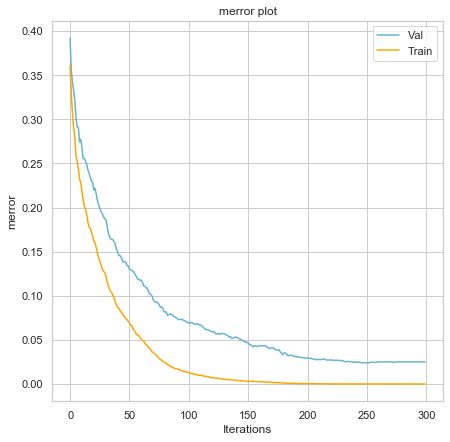

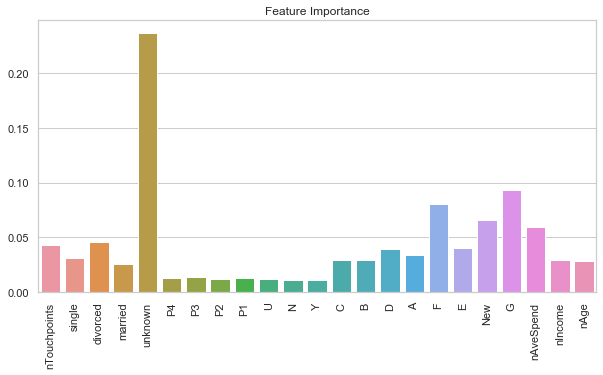

In [87]:
xgb2 = XGBClassifier(learning_rate=0.1,
                    n_estimators=1000,
                    max_depth=9,
                    min_child_weight=1,
                    gamma=0,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    objective='multi:softmax',
                    nthread=4,
                    num_class=9,
                    seed=27)

fitXgb(xgb2, training_data)

In [92]:
param_test2 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch2 = GridSearchCV(estimator = xgb2, param_grid = param_test2, scoring='f1_micro',n_jobs=-1,verbose = 10, cv=3)
gsearch2.fit(X_train, Y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  15 | elapsed:  6.4min remaining: 41.8min
[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:  6.4min remaining: 17.7min
[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed:  6.5min remaining:  9.8min
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:  6.7min remaining:  5.8min
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:  7.9min remaining:  4.0min
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed: 10.9min remaining:  2.7min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 11.0min finished
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A c

GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.8, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=9, min_child_weight=1,
                                     missing=nan, monotone_constraints='()',
                                     n_estimators=1000, n_jobs=4, n...
                                     num_class=9, num_parallel_tree=1,
                                     objective='multi:softprob',
                                     random_state=27, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=None, seed=27,
                                

I will tune gamma, subsample and colsample_bytree and learning rate if I had enough computational power. Due to the limited time I have, I only focus on max_depth and reg_alpha (applying regularization to reduce overfitting).

In [93]:
getTrainScores(gsearch2)

({0: "mean:0.9100938241422663params{'reg_alpha': 1e-05}",
  1: "mean:0.9120502334359006params{'reg_alpha': 0.01}",
  2: "mean:0.9102716018947398params{'reg_alpha': 0.1}",
  3: "mean:0.8956869228924701params{'reg_alpha': 1}",
  4: "mean:0.450422638495132params{'reg_alpha': 100}"},
 {'best_mean': 0.9120502334359006, 'best_param': {'reg_alpha': 0.01}})

We have found that max_depth of 9, min_child_weight of 1 and reg_alpha of 0.01 are optimum hyperparameters for the xgb model

Fitting model...
Fitting done!
[0]	val-mlogloss:2.02665	val-merror:0.39307	train-mlogloss:2.01937	train-merror:0.35963
[100]	val-mlogloss:0.41486	val-merror:0.06507	train-mlogloss:0.26570	train-merror:0.01201
[200]	val-mlogloss:0.22389	val-merror:0.03307	train-mlogloss:0.09071	train-merror:0.00027
[299]	val-mlogloss:0.16446	val-merror:0.02453	train-mlogloss:0.04494	train-merror:0.00000
-- Model Report --
XGBoost Accuracy: 0.9678972712680578
XGBoost F1-Score (Micro): 0.9678972712680578


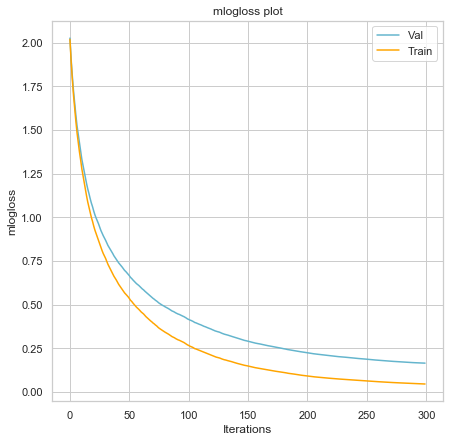

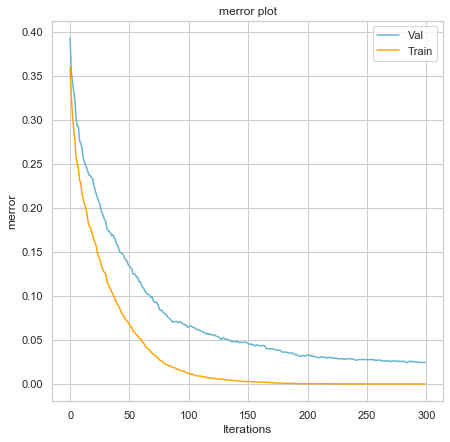

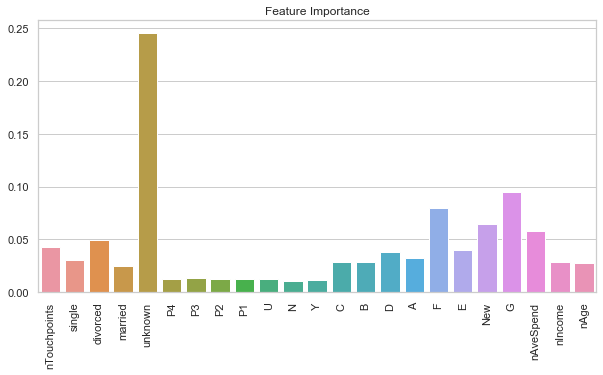

In [94]:
xgb3 = XGBClassifier(learning_rate=0.1,
                    n_estimators=1000,
                    max_depth=9,
                    min_child_weight=1,
                    reg_alpha=0.01,
                    gamma=0,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    objective='multi:softmax',
                    nthread=4,
                    num_class=9,
                    seed=27)

fitXgb(xgb3, training_data)

We see that a high feature importance score is assigned to 'unknown' marital status. This could be due to the fact that there are only 44 customers with 'unknown' marital status, hence to reduce bias, our xgb model assigns more weight to 'unknown' feature